### Imports

In [46]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.preprocessing import LabelEncoder
from lifelines.utils import k_fold_cross_validation, survival_table_from_events
from lifelines import WeibullAFTFitter, LogNormalAFTFitter, LogLogisticAFTFitter

### Data

In [47]:
telco_data = pd.read_csv('telco.csv')
telco_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 15 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   ID        1000 non-null   int64 
 1   region    1000 non-null   object
 2   tenure    1000 non-null   int64 
 3   age       1000 non-null   int64 
 4   marital   1000 non-null   object
 5   address   1000 non-null   int64 
 6   income    1000 non-null   int64 
 7   ed        1000 non-null   object
 8   retire    1000 non-null   object
 9   gender    1000 non-null   object
 10  voice     1000 non-null   object
 11  internet  1000 non-null   object
 12  forward   1000 non-null   object
 13  custcat   1000 non-null   object
 14  churn     1000 non-null   object
dtypes: int64(5), object(10)
memory usage: 117.3+ KB


In [48]:
telco_data.head()

,ID,region,tenure,age,marital,address,income,ed,retire,gender,voice,internet,forward,custcat,churn
0,1,Zone 2,13,44,Married,9,64,College degree,No,Male,No,No,Yes,Basic service,Yes
1,2,Zone 3,11,33,Married,7,136,Post-undergraduate degree,No,Male,Yes,No,Yes,Total service,Yes
2,3,Zone 3,68,52,Married,24,116,Did not complete high school,No,Female,No,No,No,Plus service,No
3,4,Zone 2,33,33,Unmarried,12,33,High school degree,No,Female,No,No,No,Basic service,Yes
4,5,Zone 2,23,30,Married,9,30,Did not complete high school,No,Male,No,No,Yes,Plus service,No


### Parametric Models

In [49]:
le = LabelEncoder()

categorical_columns = ['region', 'ed', 'custcat']
telco_data = pd.get_dummies(telco_data, columns=categorical_columns, drop_first=True)

binary_columns = ['marital', 'retire', 'gender', 'voice', 'internet', 'forward', 'churn', 'region_Zone 2',
       'region_Zone 3', 'ed_Did not complete high school', 'ed_High school degree', 'ed_Post-undergraduate degree',
       'ed_Some college', 'custcat_E-service', 'custcat_Plus service', 'custcat_Total service']
for column in binary_columns:
    telco_data[column] = le.fit_transform(telco_data[column])

telco_data.head()


,ID,tenure,age,marital,address,income,retire,gender,voice,internet,...,churn,region_Zone 2,region_Zone 3,ed_Did not complete high school,ed_High school degree,ed_Post-undergraduate degree,ed_Some college,custcat_E-service,custcat_Plus service,custcat_Total service
0,1,13,44,0,9,64,0,1,0,0,...,1,1,0,0,0,0,0,0,0,0
1,2,11,33,0,7,136,0,1,1,0,...,1,0,1,0,0,1,0,0,0,1
2,3,68,52,0,24,116,0,0,0,0,...,0,0,1,1,0,0,0,0,1,0
3,4,33,33,1,12,33,0,0,0,0,...,1,1,0,0,1,0,0,0,0,0
4,5,23,30,0,9,30,0,1,0,0,...,0,1,0,1,0,0,0,0,1,0


In [50]:
aft_weibull = WeibullAFTFitter()
aft_log_normal = LogNormalAFTFitter()
aft_log_logistic = LogLogisticAFTFitter()

aft_weibull.fit(telco_data, duration_col='tenure', event_col='churn')
aft_log_normal.fit(telco_data, duration_col='tenure', event_col='churn')
aft_log_logistic.fit(telco_data, duration_col='tenure', event_col='churn')

<lifelines.LogLogisticAFTFitter: fitted with 1000 total observations, 726 right-censored observations>

In [51]:
print("Weibull AFT Model Summary:")
print(aft_weibull.summary)

Weibull AFT Model Summary:
                                             coef  exp(coef)  se(coef)  \
param   covariate                                                        
lambda_ ID                              -0.000514   0.999486  0.000182   
        address                          0.041965   1.042858  0.008765   
        age                              0.028338   1.028743  0.006734   
        custcat_E-service                0.981685   2.668950  0.154014   
        custcat_Plus service             0.735620   2.086776  0.192220   
        custcat_Total service            0.962885   2.619243  0.212317   
        ed_Did not complete high school  0.463497   1.589623  0.193139   
        ed_High school degree            0.294820   1.342885  0.144773   
        ed_Post-undergraduate degree     0.176300   1.192796  0.189922   
        ed_Some college                  0.252504   1.287245  0.143347   
        forward                         -0.089337   0.914537  0.148469   
        gen

In [52]:
print("\nLog-Normal AFT Model Summary:")
print(aft_log_normal.summary)


Log-Normal AFT Model Summary:
                                            coef  exp(coef)  se(coef)  \
param  covariate                                                        
mu_    ID                              -0.000474   0.999526  0.000198   
       address                          0.042630   1.043551  0.008880   
       age                              0.033230   1.033788  0.007241   
       custcat_E-service                1.064673   2.899891  0.169648   
       custcat_Plus service             0.937889   2.554584  0.215175   
       custcat_Total service            1.210374   3.354739  0.249688   
       ed_Did not complete high school  0.376412   1.457047  0.200659   
       ed_High school degree            0.306672   1.358895  0.162321   
       ed_Post-undergraduate degree    -0.053980   0.947451  0.222322   
       ed_Some college                  0.285017   1.329785  0.164680   
       forward                         -0.203822   0.815608  0.179371   
       gender       

In [53]:
print("\nLog-Logistic AFT Model Summary:")
print(aft_log_logistic.summary)


Log-Logistic AFT Model Summary:
                                            coef  exp(coef)  se(coef)  \
param  covariate                                                        
alpha_ ID                              -0.000466   0.999535  0.000191   
       address                          0.039359   1.040144  0.008782   
       age                              0.032634   1.033172  0.006890   
       custcat_E-service                1.045089   2.843652  0.164304   
       custcat_Plus service             0.873058   2.394220  0.208542   
       custcat_Total service            1.202327   3.327851  0.240200   
       ed_Did not complete high school  0.446926   1.563498  0.198554   
       ed_High school degree            0.318642   1.375259  0.153536   
       ed_Post-undergraduate degree    -0.056649   0.944926  0.213360   
       ed_Some college                  0.251714   1.286229  0.154643   
       forward                         -0.195962   0.822043  0.169892   
       gender     

In [54]:
print(f"Weibull AFT - AIC: {aft_weibull.AIC_}, BIC: {aft_weibull.BIC_}")
print(f"Log-Normal AFT - AIC: {aft_log_normal.AIC_}, BIC: {aft_log_normal.BIC_}")
print(f"Log-Logistic AFT - AIC: {aft_log_logistic.AIC_}, BIC: {aft_log_logistic.BIC_}")

Weibull AFT - AIC: 2958.3571269466456, BIC: 2930.17263750461
Log-Normal AFT - AIC: 2950.3002131922785, BIC: 2922.115723750243
Log-Logistic AFT - AIC: 2952.2582596356688, BIC: 2924.073770193633


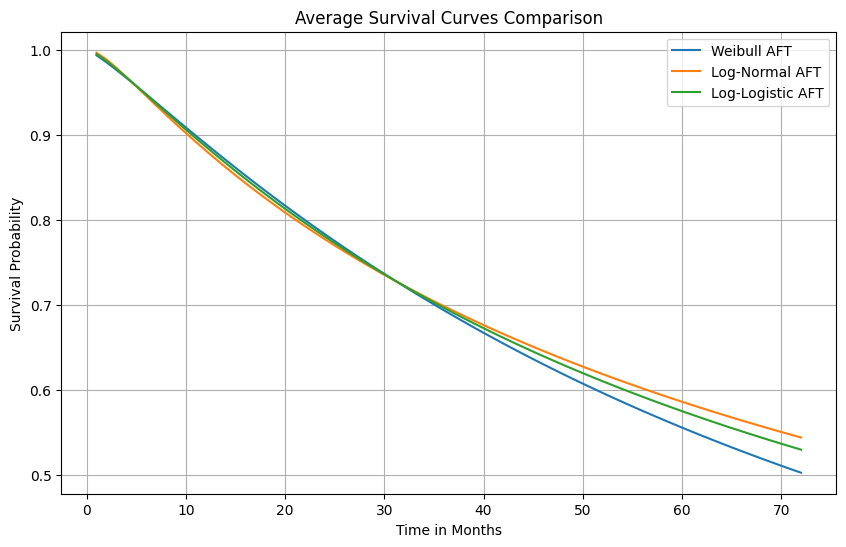

In [55]:
fig, ax = plt.subplots(figsize=(10, 6))

sample_data = telco_data.sample(n=100, random_state=394)

mean_survival_weibull = aft_weibull.predict_survival_function(sample_data).mean(axis=1)
ax.plot(mean_survival_weibull, label='Weibull AFT')

mean_survival_log_normal = aft_log_normal.predict_survival_function(sample_data).mean(axis=1)
ax.plot(mean_survival_log_normal, label='Log-Normal AFT')

mean_survival_log_logistic = aft_log_logistic.predict_survival_function(sample_data).mean(axis=1)
ax.plot(mean_survival_log_logistic, label='Log-Logistic AFT')

ax.set_title('Average Survival Curves Comparison')
ax.set_xlabel('Time in Months')
ax.set_ylabel('Survival Probability')
ax.legend()
ax.grid(True)

plt.show()


In [56]:
significant_features_weibull = aft_weibull.summary.loc[aft_weibull.summary['p'] < 0.05]
significant_features_log_normal = aft_log_normal.summary.loc[aft_log_normal.summary['p'] < 0.05]
significant_features_log_logistic = aft_log_logistic.summary.loc[aft_log_logistic.summary['p'] < 0.05]

In [57]:
print("Significant features in the Weibull AFT model:")
print(significant_features_weibull['p'])

Significant features in the Weibull AFT model:
param    covariate                      
lambda_  ID                                 4.756795e-03
         address                            1.684377e-06
         age                                2.574589e-05
         custcat_E-service                  1.841649e-10
         custcat_Plus service               1.297294e-04
         custcat_Total service              5.756651e-06
         ed_Did not complete high school    1.640376e-02
         ed_High school degree              4.170714e-02
         internet                           1.035390e-08
         marital                            6.293662e-04
         voice                              4.958432e-02
         Intercept                          6.993266e-27
rho_     Intercept                          3.161405e-04
Name: p, dtype: float64


In [58]:
print("Significant features in the Log Normal AFT model:")
print(significant_features_log_normal['p'])

Significant features in the Log Normal AFT model:
param   covariate            
mu_     ID                       1.688383e-02
        address                  1.583413e-06
        age                      4.452797e-06
        custcat_E-service        3.479244e-10
        custcat_Plus service     1.308250e-05
        custcat_Total service    1.250006e-06
        internet                 3.375217e-08
        marital                  1.109659e-04
        voice                    1.502942e-02
        Intercept                3.110806e-17
sigma_  Intercept                4.459260e-09
Name: p, dtype: float64


In [59]:
print("Significant features in the Log Logistic AFT model:")
print(significant_features_log_logistic['p'])

Significant features in the Log Logistic AFT model:
param   covariate                      
alpha_  ID                                 1.496213e-02
        address                            7.398841e-06
        age                                2.177071e-06
        custcat_E-service                  2.008259e-10
        custcat_Plus service               2.832974e-05
        custcat_Total service              5.570948e-07
        ed_Did not complete high school    2.439139e-02
        ed_High school degree              3.795345e-02
        internet                           1.077587e-08
        marital                            8.970284e-05
        voice                              2.479543e-02
        Intercept                          2.794352e-18
beta_   Intercept                          1.205031e-11
Name: p, dtype: float64


In [60]:
weibull_scores = k_fold_cross_validation(aft_weibull, telco_data, 'tenure', event_col='churn', k=5)
log_normal_scores = k_fold_cross_validation(aft_log_normal, telco_data, 'tenure', event_col='churn', k=5)
log_logistic_scores = k_fold_cross_validation(aft_log_logistic, telco_data, 'tenure', event_col='churn', k=5)

print(f"Weibull AFT Cross-validation concordance index: {weibull_scores}")
print(f"Log-Normal AFT Cross-validation concordance index: {log_normal_scores}")
print(f"Log-Logistic AFT Cross-validation concordance index: {log_logistic_scores}")


Weibull AFT Cross-validation concordance index: [-1.4485357589522636, -1.4609646699391516, -1.5695097651354988, -1.5089483734491511, -1.4524659813024334]
Log-Normal AFT Cross-validation concordance index: [-1.540933931186992, -1.4515429241125108, -1.4519313981961017, -1.4765314652460402, -1.4664669494668656]
Log-Logistic AFT Cross-validation concordance index: [-1.4436592599383922, -1.4475236445130129, -1.4790265087191241, -1.5067319051950898, -1.515547884883386]


#### Based on the previously estimated factors it is logical to proceed with the Log-Normal AFT.

In [61]:
significant_features = ['address', 'age', 'custcat_E-service', 'custcat_Plus service', 'custcat_Total service', 'internet', 'marital', 'voice', 'tenure', 'churn']
X_significant = telco_data[significant_features]

aft_log_normal_final = LogNormalAFTFitter()
aft_log_normal_final.fit(X_significant, duration_col='tenure', event_col='churn')

<lifelines.LogNormalAFTFitter: fitted with 1000 total observations, 726 right-censored observations>

### CLV


In [62]:
T = telco_data['tenure']
E = telco_data['churn']
customer_revenue = telco_data['income']

survival_table = survival_table_from_events(T, E)

predicted_survival = aft_log_normal.predict_survival_function(telco_data)

telco_data['expected_lifetime'] = predicted_survival.apply(lambda x: x.mean(), axis=1)

telco_data['CLV'] = telco_data['expected_lifetime'] * customer_revenue

In [65]:
survival_table

,removed,observed,censored,entrance,at_risk
event_at,,,,,
0.0,0,0,0,1000,1000
1.0,13,10,3,0,1000
2.0,7,3,4,0,987
3.0,20,15,5,0,980
4.0,19,11,8,0,960
...,...,...,...,...,...
68.0,9,1,8,0,82
69.0,14,1,13,0,73
70.0,11,0,11,0,59


In [64]:
segmented_clv_by_custcat = telco_data.groupby(['custcat_E-service', 'custcat_Plus service', 'custcat_Total service'])['CLV'].mean()
segmented_clv_by_custcat

custcat_E-service  custcat_Plus service  custcat_Total service
0                  0                     0                        33.096989
                                         1                        87.363972
                   1                     0                        56.890156
1                  0                     0                        37.314291
Name: CLV, dtype: float64

### Report

In this analysis, I utilized the Log-Normal AFT model for survival analysis, because it proved to be the most statistically robust, as indicated by the lowest AIC and BIC values among the other ones and of course taking into consideration other metrics and plot. The coefficients from this model suggest that factors such as service type (E-service, Plus service, and Total service) have significant impacts on customer tenure, with Total service subscribers showing the highest Customer Lifetime Value (CLV). This implies that customers with comprehensive service packages tend to remain with the service longer, contributing more to the company's revenue over time. The survival probabilities calculated indicate a varied risk of churn across different segments. For instance, the segment subscribed to the Total service package exhibits a significantly lower churn risk, aligning with its higher CLV. This insight is critical for defining the most valuable segments. These segments are therefore prime targets for retention initiatives.

Given these findings, the annual retention budget should be allocated more heavily towards these high-value segments. In addition to financial allocation, I suggest implementing predictive analytics to identify at-risk subscribers before signs of churn become apparent. This could involve machine learning models trained on historical data to predict potential churn, enabling proactive engagement strategies. Furthermore, enhancing customer service and support, particularly for high-value and at-risk segments, can significantly improve customer satisfaction and retention.